In [126]:
# Written by Herman van Haagen, https://www.linkedin.com/in/hermanvanhaagen/

In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Functions

In [128]:
# This is a simple function that shows how the spiral data looks like
def plotspiraldataset(x,y,labels):
    neg = np.where(labels==0)[0]
    pos = np.where(labels==1)[0]
    plt.scatter(x[neg],y[neg])
    plt.scatter(x[pos],y[pos])
    plt.show()

In [129]:
# The activation function for the hidden layers
def ReLU(x):
    return np.maximum(0,x)

In [130]:
# The derivatie of the ReLU
def ReLU_prime(x):
    return (x>0)*1

In [131]:
def softmax(X):
    return np.exp(X)/np.sum(np.exp(X))

In [132]:
# We are using a softmax activation function as the output. 
# For that we need to label our labels as onehot. 
def onehot(label):
    if label==1.0:
        x = np.array([0,1])
        return x[:,np.newaxis]
    if label==0.0:
        x = np.array([1,0])
        return x[:,np.newaxis]

### Load spiral dataset

In [133]:
# Load the spiral dataset
spiral = pd.read_csv('spiral.csv',sep=',')

In [134]:
# Check the first 5 rows of the data
spiral.head()

,x,y,label
0,8.75789,4.91060,1.0
1,2.77911,-14.11911,0.0
2,6.62426,8.03778,1.0
3,8.88349,-12.84646,0.0
4,-4.09557,12.05776,1.0


In [135]:
# Normalize the dataset using the mi/nmax normalizer
spiral['x'] = spiral['x']-np.min(spiral['x'])
spiral['y'] = spiral['y']-np.min(spiral['y'])
spiral['x'] = spiral['x']/np.max(spiral['x'])
spiral['y'] = spiral['y']/np.max(spiral['y'])

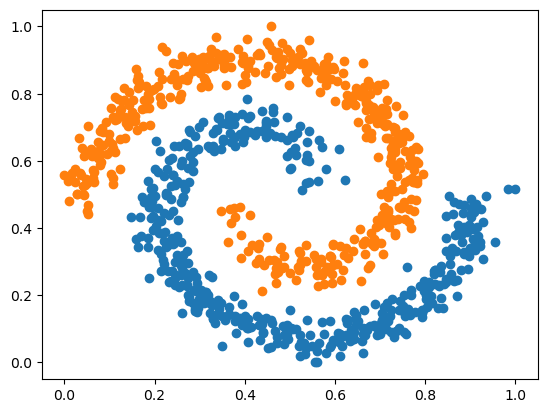

In [136]:
# Then we plot the spiral data
plotspiraldataset(spiral['x'],spiral['y'],spiral['label'])

### Initialize weights and training parameters

In [137]:
epochs = 200
lr = 0.01

In [138]:
N = 128
W0 = np.random.rand(N,2)
W1 = np.random.rand(2,N)
B0 = np.random.rand(N,1)
B1 = np.random.rand(2,1)

W0_m = np.array(W0, copy=True)
W1_m = np.array(W1, copy=True)
B0_m = np.array(B0, copy=True)
B1_m = np.array(B1, copy=True)

In [139]:
accuracy = []

for k in range(epochs):
            
    correct = 0
    fout = 0
    for index, row in spiral.iterrows():
        
        # Select one instance of the data (stochastic gradient descent)
        X0 = np.array(row[0:2])
        X0 = X0[ :,np.newaxis]
        label = row['label']
        
        #The forward pass
        Y0 = np.matmul(W0, X0)+B0
        X1 = ReLU(Y0)
        Y1 = np.matmul(W1, X1)+B1
        X2 = ReLU(Y1)
        
        out = softmax(X2)
        
        
        
        prediction = float(out[0][0])>0.5
        #print(prediction)
        if label==prediction:
            correct = correct+1
        else:
            fout = fout+1
    
        # backpropagation
        error = out-onehot(label)
        
        d1  = error*ReLU_prime(Y1)
        dW1 = np.matmul(d1,np.transpose(X1))
        dB1 = d1
    
        d0  = np.matmul(np.transpose(W1),d1)*ReLU_prime(Y0)
        dW0 = np.matmul(d0,np.transpose(X0))
        dB0 = d0

        #update rule
        W0 = W0-lr*dW0
        W1 = W1-lr*dW1
        B0 = B0-lr*dB0
        B1 = B1-lr*dB1
        
    print('epoch: '+str(k)+'\t'+str(correct)+'\t'+str(fout))
    accuracy += [(fout/900)]

epoch: 0	323	577
epoch: 1	278	622
epoch: 2	271	629
epoch: 3	273	627
epoch: 4	271	629
epoch: 5	273	627
epoch: 6	268	632
epoch: 7	270	630
epoch: 8	266	634
epoch: 9	263	637
epoch: 10	262	638
epoch: 11	262	638
epoch: 12	263	637
epoch: 13	261	639
epoch: 14	261	639
epoch: 15	263	637
epoch: 16	264	636
epoch: 17	264	636
epoch: 18	264	636
epoch: 19	262	638
epoch: 20	265	635
epoch: 21	264	636
epoch: 22	264	636
epoch: 23	261	639
epoch: 24	258	642
epoch: 25	257	643
epoch: 26	256	644
epoch: 27	256	644
epoch: 28	255	645
epoch: 29	255	645
epoch: 30	255	645
epoch: 31	252	648
epoch: 32	252	648
epoch: 33	251	649
epoch: 34	251	649
epoch: 35	251	649
epoch: 36	251	649
epoch: 37	251	649
epoch: 38	250	650
epoch: 39	248	652
epoch: 40	248	652
epoch: 41	246	654
epoch: 42	243	657
epoch: 43	243	657
epoch: 44	244	656
epoch: 45	241	659
epoch: 46	239	661
epoch: 47	239	661
epoch: 48	236	664
epoch: 49	236	664
epoch: 50	234	666
epoch: 51	232	668
epoch: 52	230	670
epoch: 53	231	669
epoch: 54	231	669
epoch: 55	230	670
ep

### Visualize the trained results

In [140]:
# Fill a grid of 1 by 1 with random number
x = np.random.rand(10000)
y = np.random.rand(10000)

In [141]:
# Classify these numbers with the trained classifier
# This will show how the discriminant lines look like. 
pred = []
for k in range(len(x)):
        
    X0 = np.array([x[k],y[k]])
    X0 = X0[ :,np.newaxis]
        
    #The forward pass
    Y0 = np.matmul(W0, X0)+B0
    X1 = ReLU(Y0)
    Y1 = np.matmul(W1, X1)+B1
    X2 = ReLU(Y1)
    out = np.exp(X2)/np.sum(np.exp(X2))
            
    prediction = float(out[0][0])>0.5
    if label!=prediction:
        pred += [k]

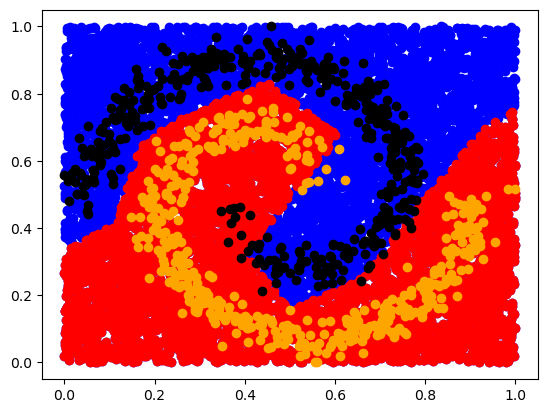

In [142]:
# Plot the discriminant lines (in red and blue) with the original dataset
plt.scatter(x,y,color='blue')
plt.scatter(x[pred],y[pred],color='red')

neg = np.where(spiral['label']==0)[0]
pos = np.where(spiral['label']==1)[0]
plt.scatter(spiral['x'][neg],spiral['y'][neg],color='orange')
plt.scatter(spiral['x'][pos],spiral['y'][pos],color='black')
plt.show()

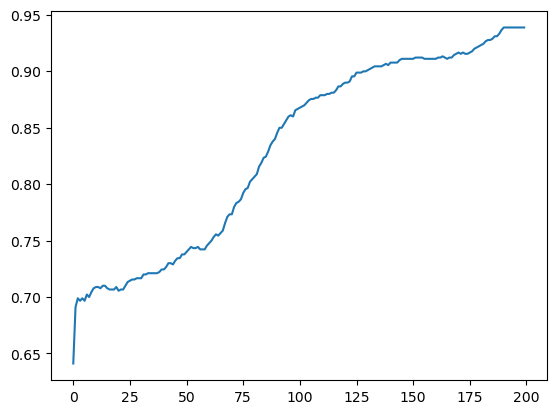

In [143]:
plt.plot(accuracy)
plt.show()

# Now the MLP with momentum

In [144]:
# For a check how to correctly implement de momentum. Check this link
# https://stackoverflow.com/questions/74164897/momentum-does-not-work-in-my-gradient-descent-algorithm

In [145]:
W0 = np.array(W0_m, copy=True)
W1 = np.array(W1_m, copy=True)
B0 = np.array(B0_m, copy=True)
B1 = np.array(B1_m, copy=True)

In [146]:
accuracy_m = []

momentumW0 = 0
momentumW1 = 0
momentumB0 = 0
momentumB1 = 0


for k in range(epochs):
            
    correct = 0
    fout = 0
    for index, row in spiral.iterrows():
        
        # Select one instance of the data (stochastic gradient descent)
        X0 = np.array(row[0:2])
        X0 = X0[ :,np.newaxis]
        label = row['label']
        
        #The forward pass
        Y0 = np.matmul(W0, X0)+B0
        X1 = ReLU(Y0)
        Y1 = np.matmul(W1, X1)+B1
        X2 = ReLU(Y1)
        
        out = softmax(X2)
        
        prediction = float(out[0][0])>0.5
        #print(prediction)
        if label==prediction:
            correct = correct+1
        else:
            fout = fout+1
    
        # backpropagation
        error = out-onehot(label)
        
        d1  = error*ReLU_prime(Y1)
        dW1 = np.matmul(d1,np.transpose(X1))
        dB1 = d1
    
        d0  = np.matmul(np.transpose(W1),d1)*ReLU_prime(Y0)
        dW0 = np.matmul(d0,np.transpose(X0))
        dB0 = d0
        
        momentumW0 = lr*dW0 + 0.9*momentumW0
        momentumW1 = lr*dW1 + 0.9*momentumW1
        momentumB0 = lr*dB0 + 0.9*momentumB0
        momentumB1 = lr*dB1 + 0.9*momentumB1

        #update rule
        W0 = W0-momentumW0
        W1 = W1-momentumW1
        B0 = B0-momentumB0
        B1 = B1-momentumB1
        
    print('epoch: '+str(k)+'\t'+str(correct)+'\t'+str(fout))
    accuracy_m += [(fout/900)]

epoch: 0	292	608
epoch: 1	264	636
epoch: 2	252	648
epoch: 3	234	666
epoch: 4	209	691
epoch: 5	195	705
epoch: 6	164	736
epoch: 7	125	775
epoch: 8	94	806
epoch: 9	70	830
epoch: 10	63	837
epoch: 11	65	835
epoch: 12	56	844
epoch: 13	44	856
epoch: 14	39	861
epoch: 15	34	866
epoch: 16	32	868
epoch: 17	32	868
epoch: 18	26	874
epoch: 19	27	873
epoch: 20	27	873
epoch: 21	25	875
epoch: 22	21	879
epoch: 23	22	878
epoch: 24	20	880
epoch: 25	28	872
epoch: 26	17	883
epoch: 27	19	881
epoch: 28	20	880
epoch: 29	24	876
epoch: 30	21	879
epoch: 31	24	876
epoch: 32	19	881
epoch: 33	21	879
epoch: 34	21	879
epoch: 35	18	882
epoch: 36	23	877
epoch: 37	23	877
epoch: 38	27	873
epoch: 39	22	878
epoch: 40	31	869
epoch: 41	19	881
epoch: 42	25	875
epoch: 43	16	884
epoch: 44	20	880
epoch: 45	21	879
epoch: 46	20	880
epoch: 47	15	885
epoch: 48	31	869
epoch: 49	19	881
epoch: 50	11	889
epoch: 51	25	875
epoch: 52	12	888
epoch: 53	13	887
epoch: 54	10	890
epoch: 55	18	882
epoch: 56	24	876
epoch: 57	17	883
epoch: 58	21	879

In [147]:
# Fill a grid of 1 by 1 with random number
x = np.random.rand(10000)
y = np.random.rand(10000)

In [148]:
# Classify these numbers with the trained classifier
# This will show how the discriminant lines look like. 
pred = []
for k in range(len(x)):
        
    X0 = np.array([x[k],y[k]])
    X0 = X0[ :,np.newaxis]
        
    #The forward pass
    Y0 = np.matmul(W0, X0)+B0
    X1 = ReLU(Y0)
    Y1 = np.matmul(W1, X1)+B1
    X2 = ReLU(Y1)
    out = np.exp(X2)/np.sum(np.exp(X2))
            
    prediction = float(out[0][0])>0.5
    if label!=prediction:
        pred += [k]

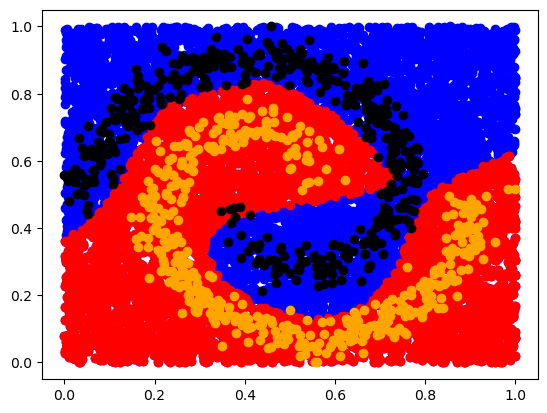

In [149]:
# Plot the discriminant lines (in red and blue) with the original dataset
plt.scatter(x,y,color='blue')
plt.scatter(x[pred],y[pred],color='red')

neg = np.where(spiral['label']==0)[0]
pos = np.where(spiral['label']==1)[0]
plt.scatter(spiral['x'][neg],spiral['y'][neg],color='orange')
plt.scatter(spiral['x'][pos],spiral['y'][pos],color='black')
plt.show()

As you can see the MLP with momentum converges way faster. Therefore we need less epochs. Or we can use a higher learning rate. 

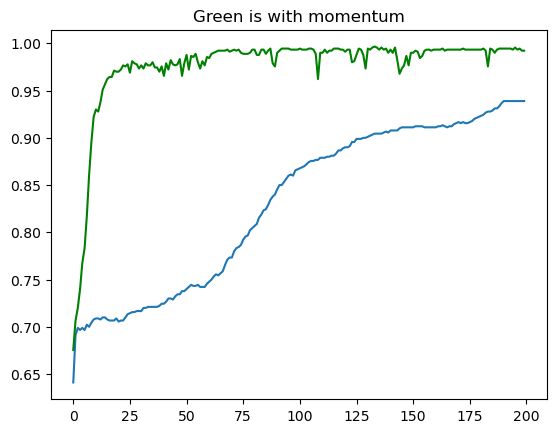

In [151]:
plt.plot(accuracy)
plt.plot(accuracy_m,color="green")
plt.title('Green is with momentum')
plt.show()